In [100]:
import numpy as np
import torch
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
torch.__version__

'2.1.1+cpu'

In [102]:
np.random.seed(1943)
torch.manual_seed(1943)

In [103]:
# setosa: (1,0,0)
# versicolor: (0,1,0)
# virginica: (0,0,1)
# Sepal length, Sepal width, Petal length, Petal width
iris = [((5.1, 3.5, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.0, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((4.6, 3.1, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.6, 1.4, 0.2), (1, 0, 0)),
        ((5.4, 3.9, 1.7, 0.4), (1, 0, 0)),
        ((4.6, 3.4, 1.4, 0.3), (1, 0, 0)),
        ((5.0, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((4.4, 2.9, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.4, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((4.8, 3.4, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.1), (1, 0, 0)),
        ((4.3, 3.0, 1.1, 0.1), (1, 0, 0)),
        ((5.8, 4.0, 1.2, 0.2), (1, 0, 0)),
        ((5.7, 4.4, 1.5, 0.4), (1, 0, 0)),
        ((5.4, 3.9, 1.3, 0.4), (1, 0, 0)),
        ((5.1, 3.5, 1.4, 0.3), (1, 0, 0)),
        ((5.7, 3.8, 1.7, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.5, 0.3), (1, 0, 0)),
        ((5.4, 3.4, 1.7, 0.2), (1, 0, 0)),
        ((5.1, 3.7, 1.5, 0.4), (1, 0, 0)),
        ((4.6, 3.6, 1.0, 0.2), (1, 0, 0)),
        ((5.1, 3.3, 1.7, 0.5), (1, 0, 0)),
        ((4.8, 3.4, 1.9, 0.2), (1, 0, 0)),
        ((5.0, 3.0, 1.6, 0.2), (1, 0, 0)),
        ((5.0, 3.4, 1.6, 0.4), (1, 0, 0)),
        ((5.2, 3.5, 1.5, 0.2), (1, 0, 0)),
        ((5.2, 3.4, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.1, 1.6, 0.2), (1, 0, 0)),
        ((5.4, 3.4, 1.5, 0.4), (1, 0, 0)),
        ((5.2, 4.1, 1.5, 0.1), (1, 0, 0)),
        ((5.5, 4.2, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.0, 3.2, 1.2, 0.2), (1, 0, 0)),
        ((5.5, 3.5, 1.3, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((4.4, 3.0, 1.3, 0.2), (1, 0, 0)),
        ((5.1, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.3, 0.3), (1, 0, 0)),
        ((4.5, 2.3, 1.3, 0.3), (1, 0, 0)),
        ((4.4, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.6, 0.6), (1, 0, 0)),
        ((5.1, 3.8, 1.9, 0.4), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.6, 0.2), (1, 0, 0)),
        ((4.6, 3.2, 1.4, 0.2), (1, 0, 0)),
        ((5.3, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.3, 1.4, 0.2), (1, 0, 0)),
        ((7.0, 3.2, 4.7, 1.4), (0, 1, 0)),
        ((6.4, 3.2, 4.5, 1.5), (0, 1, 0)),
        ((6.9, 3.1, 4.9, 1.5), (0, 1, 0)),
        ((5.5, 2.3, 4.0, 1.3), (0, 1, 0)),
        ((6.5, 2.8, 4.6, 1.5), (0, 1, 0)),
        ((5.7, 2.8, 4.5, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 4.7, 1.6), (0, 1, 0)),
        ((4.9, 2.4, 3.3, 1.0), (0, 1, 0)),
        ((6.6, 2.9, 4.6, 1.3), (0, 1, 0)),
        ((5.2, 2.7, 3.9, 1.4), (0, 1, 0)),
        ((5.0, 2.0, 3.5, 1.0), (0, 1, 0)),
        ((5.9, 3.0, 4.2, 1.5), (0, 1, 0)),
        ((6.0, 2.2, 4.0, 1.0), (0, 1, 0)),
        ((6.1, 2.9, 4.7, 1.4), (0, 1, 0)),
        ((5.6, 2.9, 3.6, 1.3), (0, 1, 0)),
        ((6.7, 3.1, 4.4, 1.4), (0, 1, 0)),
        ((5.6, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((5.8, 2.7, 4.1, 1.0), (0, 1, 0)),
        ((6.2, 2.2, 4.5, 1.5), (0, 1, 0)),
        ((5.6, 2.5, 3.9, 1.1), (0, 1, 0)),
        ((5.9, 3.2, 4.8, 1.8), (0, 1, 0)),
        ((6.1, 2.8, 4.0, 1.3), (0, 1, 0)),
        ((6.3, 2.5, 4.9, 1.5), (0, 1, 0)),
        ((6.1, 2.8, 4.7, 1.2), (0, 1, 0)),
        ((6.4, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((6.6, 3.0, 4.4, 1.4), (0, 1, 0)),
        ((6.8, 2.8, 4.8, 1.4), (0, 1, 0)),
        ((6.7, 3.0, 5.0, 1.7), (0, 1, 0)),
        ((6.0, 2.9, 4.5, 1.5), (0, 1, 0)),
        ((5.7, 2.6, 3.5, 1.0), (0, 1, 0)),
        ((5.5, 2.4, 3.8, 1.1), (0, 1, 0)),
        ((5.5, 2.4, 3.7, 1.0), (0, 1, 0)),
        ((5.8, 2.7, 3.9, 1.2), (0, 1, 0)),
        ((6.0, 2.7, 5.1, 1.6), (0, 1, 0)),
        ((5.4, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((6.0, 3.4, 4.5, 1.6), (0, 1, 0)),
        ((6.7, 3.1, 4.7, 1.5), (0, 1, 0)),
        ((6.3, 2.3, 4.4, 1.3), (0, 1, 0)),
        ((5.6, 3.0, 4.1, 1.3), (0, 1, 0)),
        ((5.5, 2.5, 4.0, 1.3), (0, 1, 0)),
        ((5.5, 2.6, 4.4, 1.2), (0, 1, 0)),
        ((6.1, 3.0, 4.6, 1.4), (0, 1, 0)),
        ((5.8, 2.6, 4.0, 1.2), (0, 1, 0)),
        ((5.0, 2.3, 3.3, 1.0), (0, 1, 0)),
        ((5.6, 2.7, 4.2, 1.3), (0, 1, 0)),
        ((5.7, 3.0, 4.2, 1.2), (0, 1, 0)),
        ((5.7, 2.9, 4.2, 1.3), (0, 1, 0)),
        ((6.2, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((5.1, 2.5, 3.0, 1.1), (0, 1, 0)),
        ((5.7, 2.8, 4.1, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 6.0, 2.5), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((7.1, 3.0, 5.9, 2.1), (0, 0, 1)),
        ((6.3, 2.9, 5.6, 1.8), (0, 0, 1)),
        ((6.5, 3.0, 5.8, 2.2), (0, 0, 1)),
        ((7.6, 3.0, 6.6, 2.1), (0, 0, 1)),
        ((4.9, 2.5, 4.5, 1.7), (0, 0, 1)),
        ((7.3, 2.9, 6.3, 1.8), (0, 0, 1)),
        ((6.7, 2.5, 5.8, 1.8), (0, 0, 1)),
        ((7.2, 3.6, 6.1, 2.5), (0, 0, 1)),
        ((6.5, 3.2, 5.1, 2.0), (0, 0, 1)),
        ((6.4, 2.7, 5.3, 1.9), (0, 0, 1)),
        ((6.8, 3.0, 5.5, 2.1), (0, 0, 1)),
        ((5.7, 2.5, 5.0, 2.0), (0, 0, 1)),
        ((5.8, 2.8, 5.1, 2.4), (0, 0, 1)),
        ((6.4, 3.2, 5.3, 2.3), (0, 0, 1)),
        ((6.5, 3.0, 5.5, 1.8), (0, 0, 1)),
        ((7.7, 3.8, 6.7, 2.2), (0, 0, 1)),
        ((7.7, 2.6, 6.9, 2.3), (0, 0, 1)),
        ((6.0, 2.2, 5.0, 1.5), (0, 0, 1)),
        ((6.9, 3.2, 5.7, 2.3), (0, 0, 1)),
        ((5.6, 2.8, 4.9, 2.0), (0, 0, 1)),
        ((7.7, 2.8, 6.7, 2.0), (0, 0, 1)),
        ((6.3, 2.7, 4.9, 1.8), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.1), (0, 0, 1)),
        ((7.2, 3.2, 6.0, 1.8), (0, 0, 1)),
        ((6.2, 2.8, 4.8, 1.8), (0, 0, 1)),
        ((6.1, 3.0, 4.9, 1.8), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.1), (0, 0, 1)),
        ((7.2, 3.0, 5.8, 1.6), (0, 0, 1)),
        ((7.4, 2.8, 6.1, 1.9), (0, 0, 1)),
        ((7.9, 3.8, 6.4, 2.0), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.2), (0, 0, 1)),
        ((6.3, 2.8, 5.1, 1.5), (0, 0, 1)),
        ((6.1, 2.6, 5.6, 1.4), (0, 0, 1)),
        ((7.7, 3.0, 6.1, 2.3), (0, 0, 1)),
        ((6.3, 3.4, 5.6, 2.4), (0, 0, 1)),
        ((6.4, 3.1, 5.5, 1.8), (0, 0, 1)),
        ((6.0, 3.0, 4.8, 1.8), (0, 0, 1)),
        ((6.9, 3.1, 5.4, 2.1), (0, 0, 1)),
        ((6.7, 3.1, 5.6, 2.4), (0, 0, 1)),
        ((6.9, 3.1, 5.1, 2.3), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((6.8, 3.2, 5.9, 2.3), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.5), (0, 0, 1)),
        ((6.7, 3.0, 5.2, 2.3), (0, 0, 1)),
        ((6.3, 2.5, 5.0, 1.9), (0, 0, 1)),
        ((6.5, 3.0, 5.2, 2.0), (0, 0, 1)),
        ((6.2, 3.4, 5.4, 2.3), (0, 0, 1)),
        ((5.9, 3.0, 5.1, 1.8), (0, 0, 1))]

feature = np.vstack([np.array(i[0]) for i in iris])
label = np.vstack([np.array(i[1]) for i in iris])

_x = feature[:, 2:4]  # use "Petal length" and "Petal width" only
_y = label
d = _x.shape[1]

x = torch.from_numpy(_x.astype(np.float32))
y = torch.from_numpy(np.argmax(_y, axis=1))

In [104]:
def torch_kron_prod(a, b):
    res = torch.einsum('ij,ik->ijk', [a, b])
    res = torch.reshape(res, [-1, np.prod(res.shape[1:])])
    return res

In [105]:
def torch_bin(x, cut_points, temperature=0.1):
   
    D = cut_points.shape[0]
    W = torch.reshape(torch.linspace(1.0, D + 1.0, D + 1), [1, -1])
    cut_points, _ = torch.sort(cut_points)  # make sure cut_points is monotonically increasing
    b = torch.cumsum(torch.cat([torch.zeros([1]), -cut_points], 0),0)
    h = torch.matmul(x, W) + b
    res = torch.exp(h-torch.max(h))
    res = res/torch.sum(res, dim=-1, keepdim=True)
    return h

In [106]:
def nn_decision_tree(x, cut_points_list, leaf_score, temperature=0.1):
    # cut_points_list contains the cut_points for each dimension of feature
    leaf = reduce(torch_kron_prod,
                  map(lambda z: torch_bin(x[:, z[0]:z[0] + 1], z[1], temperature), enumerate(cut_points_list)))
    return torch.matmul(leaf, leaf_score)

In [107]:
num_cut = [1, 1]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3

In [108]:
cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]

In [109]:
leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

In [110]:
loss_function = torch.nn.CrossEntropyLoss()

In [111]:
optimizer = torch.optim.Adam(cut_points_list + [leaf_score], lr=0.01)

In [112]:
for i in range(1000):
    optimizer.zero_grad()
    y_pred = nn_decision_tree(x, cut_points_list, leaf_score, temperature=0.1)
    loss = loss_function(y_pred, y)
    loss.backward()
    optimizer.step()
    if i % 200 == 0:
        print(loss.detach().numpy())
print('error rate %.2f' % (1-np.mean(np.argmax(y_pred.detach().numpy(), axis=1)==np.argmax(_y, axis=1))))

7.0246735
0.6992948


0.16637158
0.13140528
0.12425867
error rate 0.04


In [113]:
sample_x0 = np.repeat(np.linspace(0, np.max(_x[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(_x[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_y_pred = nn_decision_tree(torch.from_numpy(sample_x.astype(np.float32)), cut_points_list, leaf_score, temperature=0.1)
sample_label = np.argmax(sample_y_pred.detach().numpy(), axis=1)

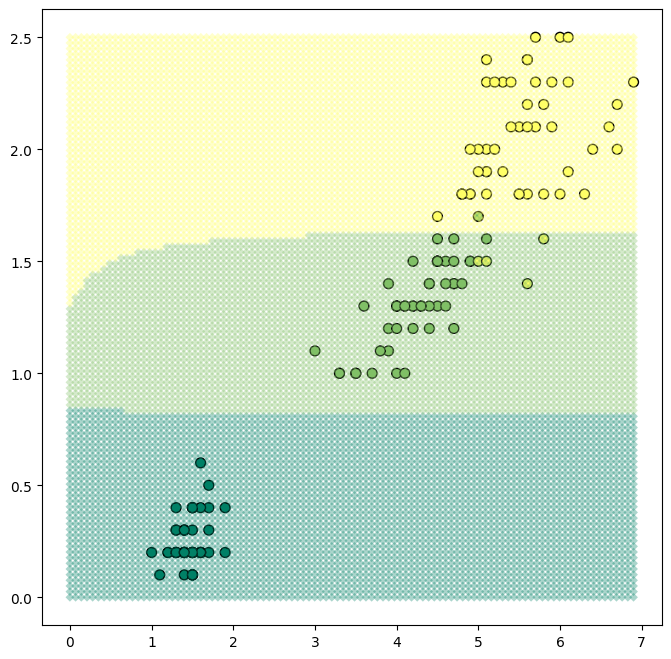

In [114]:
plt.figure(figsize=(8,8))

plt.scatter(_x[:,0], 
            _x[:,1], 
            c=np.argmax(_y, axis=1), 
            marker='o',
            s=50,
            cmap='summer', 
            edgecolors='black')

plt.scatter(sample_x0.flatten(), 
            sample_x1.flatten(), 
            c=sample_label.flatten(), 
            marker='D',
            s=20,
            cmap='summer', 
            edgecolors='none',
            alpha=0.33)

### Testing different features 


In [115]:
# setosa: (1,0,0)
# versicolor: (0,1,0)
# virginica: (0,0,1)
# Sepal length, Sepal width, Petal length, Petal width
iris = [((5.1, 3.5, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.0, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((4.6, 3.1, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.6, 1.4, 0.2), (1, 0, 0)),
        ((5.4, 3.9, 1.7, 0.4), (1, 0, 0)),
        ((4.6, 3.4, 1.4, 0.3), (1, 0, 0)),
        ((5.0, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((4.4, 2.9, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.4, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((4.8, 3.4, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.1), (1, 0, 0)),
        ((4.3, 3.0, 1.1, 0.1), (1, 0, 0)),
        ((5.8, 4.0, 1.2, 0.2), (1, 0, 0)),
        ((5.7, 4.4, 1.5, 0.4), (1, 0, 0)),
        ((5.4, 3.9, 1.3, 0.4), (1, 0, 0)),
        ((5.1, 3.5, 1.4, 0.3), (1, 0, 0)),
        ((5.7, 3.8, 1.7, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.5, 0.3), (1, 0, 0)),
        ((5.4, 3.4, 1.7, 0.2), (1, 0, 0)),
        ((5.1, 3.7, 1.5, 0.4), (1, 0, 0)),
        ((4.6, 3.6, 1.0, 0.2), (1, 0, 0)),
        ((5.1, 3.3, 1.7, 0.5), (1, 0, 0)),
        ((4.8, 3.4, 1.9, 0.2), (1, 0, 0)),
        ((5.0, 3.0, 1.6, 0.2), (1, 0, 0)),
        ((5.0, 3.4, 1.6, 0.4), (1, 0, 0)),
        ((5.2, 3.5, 1.5, 0.2), (1, 0, 0)),
        ((5.2, 3.4, 1.4, 0.2), (1, 0, 0)),
        ((4.7, 3.2, 1.6, 0.2), (1, 0, 0)),
        ((4.8, 3.1, 1.6, 0.2), (1, 0, 0)),
        ((5.4, 3.4, 1.5, 0.4), (1, 0, 0)),
        ((5.2, 4.1, 1.5, 0.1), (1, 0, 0)),
        ((5.5, 4.2, 1.4, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((5.0, 3.2, 1.2, 0.2), (1, 0, 0)),
        ((5.5, 3.5, 1.3, 0.2), (1, 0, 0)),
        ((4.9, 3.1, 1.5, 0.1), (1, 0, 0)),
        ((4.4, 3.0, 1.3, 0.2), (1, 0, 0)),
        ((5.1, 3.4, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.3, 0.3), (1, 0, 0)),
        ((4.5, 2.3, 1.3, 0.3), (1, 0, 0)),
        ((4.4, 3.2, 1.3, 0.2), (1, 0, 0)),
        ((5.0, 3.5, 1.6, 0.6), (1, 0, 0)),
        ((5.1, 3.8, 1.9, 0.4), (1, 0, 0)),
        ((4.8, 3.0, 1.4, 0.3), (1, 0, 0)),
        ((5.1, 3.8, 1.6, 0.2), (1, 0, 0)),
        ((4.6, 3.2, 1.4, 0.2), (1, 0, 0)),
        ((5.3, 3.7, 1.5, 0.2), (1, 0, 0)),
        ((5.0, 3.3, 1.4, 0.2), (1, 0, 0)),
        ((7.0, 3.2, 4.7, 1.4), (0, 1, 0)),
        ((6.4, 3.2, 4.5, 1.5), (0, 1, 0)),
        ((6.9, 3.1, 4.9, 1.5), (0, 1, 0)),
        ((5.5, 2.3, 4.0, 1.3), (0, 1, 0)),
        ((6.5, 2.8, 4.6, 1.5), (0, 1, 0)),
        ((5.7, 2.8, 4.5, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 4.7, 1.6), (0, 1, 0)),
        ((4.9, 2.4, 3.3, 1.0), (0, 1, 0)),
        ((6.6, 2.9, 4.6, 1.3), (0, 1, 0)),
        ((5.2, 2.7, 3.9, 1.4), (0, 1, 0)),
        ((5.0, 2.0, 3.5, 1.0), (0, 1, 0)),
        ((5.9, 3.0, 4.2, 1.5), (0, 1, 0)),
        ((6.0, 2.2, 4.0, 1.0), (0, 1, 0)),
        ((6.1, 2.9, 4.7, 1.4), (0, 1, 0)),
        ((5.6, 2.9, 3.6, 1.3), (0, 1, 0)),
        ((6.7, 3.1, 4.4, 1.4), (0, 1, 0)),
        ((5.6, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((5.8, 2.7, 4.1, 1.0), (0, 1, 0)),
        ((6.2, 2.2, 4.5, 1.5), (0, 1, 0)),
        ((5.6, 2.5, 3.9, 1.1), (0, 1, 0)),
        ((5.9, 3.2, 4.8, 1.8), (0, 1, 0)),
        ((6.1, 2.8, 4.0, 1.3), (0, 1, 0)),
        ((6.3, 2.5, 4.9, 1.5), (0, 1, 0)),
        ((6.1, 2.8, 4.7, 1.2), (0, 1, 0)),
        ((6.4, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((6.6, 3.0, 4.4, 1.4), (0, 1, 0)),
        ((6.8, 2.8, 4.8, 1.4), (0, 1, 0)),
        ((6.7, 3.0, 5.0, 1.7), (0, 1, 0)),
        ((6.0, 2.9, 4.5, 1.5), (0, 1, 0)),
        ((5.7, 2.6, 3.5, 1.0), (0, 1, 0)),
        ((5.5, 2.4, 3.8, 1.1), (0, 1, 0)),
        ((5.5, 2.4, 3.7, 1.0), (0, 1, 0)),
        ((5.8, 2.7, 3.9, 1.2), (0, 1, 0)),
        ((6.0, 2.7, 5.1, 1.6), (0, 1, 0)),
        ((5.4, 3.0, 4.5, 1.5), (0, 1, 0)),
        ((6.0, 3.4, 4.5, 1.6), (0, 1, 0)),
        ((6.7, 3.1, 4.7, 1.5), (0, 1, 0)),
        ((6.3, 2.3, 4.4, 1.3), (0, 1, 0)),
        ((5.6, 3.0, 4.1, 1.3), (0, 1, 0)),
        ((5.5, 2.5, 4.0, 1.3), (0, 1, 0)),
        ((5.5, 2.6, 4.4, 1.2), (0, 1, 0)),
        ((6.1, 3.0, 4.6, 1.4), (0, 1, 0)),
        ((5.8, 2.6, 4.0, 1.2), (0, 1, 0)),
        ((5.0, 2.3, 3.3, 1.0), (0, 1, 0)),
        ((5.6, 2.7, 4.2, 1.3), (0, 1, 0)),
        ((5.7, 3.0, 4.2, 1.2), (0, 1, 0)),
        ((5.7, 2.9, 4.2, 1.3), (0, 1, 0)),
        ((6.2, 2.9, 4.3, 1.3), (0, 1, 0)),
        ((5.1, 2.5, 3.0, 1.1), (0, 1, 0)),
        ((5.7, 2.8, 4.1, 1.3), (0, 1, 0)),
        ((6.3, 3.3, 6.0, 2.5), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((7.1, 3.0, 5.9, 2.1), (0, 0, 1)),
        ((6.3, 2.9, 5.6, 1.8), (0, 0, 1)),
        ((6.5, 3.0, 5.8, 2.2), (0, 0, 1)),
        ((7.6, 3.0, 6.6, 2.1), (0, 0, 1)),
        ((4.9, 2.5, 4.5, 1.7), (0, 0, 1)),
        ((7.3, 2.9, 6.3, 1.8), (0, 0, 1)),
        ((6.7, 2.5, 5.8, 1.8), (0, 0, 1)),
        ((7.2, 3.6, 6.1, 2.5), (0, 0, 1)),
        ((6.5, 3.2, 5.1, 2.0), (0, 0, 1)),
        ((6.4, 2.7, 5.3, 1.9), (0, 0, 1)),
        ((6.8, 3.0, 5.5, 2.1), (0, 0, 1)),
        ((5.7, 2.5, 5.0, 2.0), (0, 0, 1)),
        ((5.8, 2.8, 5.1, 2.4), (0, 0, 1)),
        ((6.4, 3.2, 5.3, 2.3), (0, 0, 1)),
        ((6.5, 3.0, 5.5, 1.8), (0, 0, 1)),
        ((7.7, 3.8, 6.7, 2.2), (0, 0, 1)),
        ((7.7, 2.6, 6.9, 2.3), (0, 0, 1)),
        ((6.0, 2.2, 5.0, 1.5), (0, 0, 1)),
        ((6.9, 3.2, 5.7, 2.3), (0, 0, 1)),
        ((5.6, 2.8, 4.9, 2.0), (0, 0, 1)),
        ((7.7, 2.8, 6.7, 2.0), (0, 0, 1)),
        ((6.3, 2.7, 4.9, 1.8), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.1), (0, 0, 1)),
        ((7.2, 3.2, 6.0, 1.8), (0, 0, 1)),
        ((6.2, 2.8, 4.8, 1.8), (0, 0, 1)),
        ((6.1, 3.0, 4.9, 1.8), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.1), (0, 0, 1)),
        ((7.2, 3.0, 5.8, 1.6), (0, 0, 1)),
        ((7.4, 2.8, 6.1, 1.9), (0, 0, 1)),
        ((7.9, 3.8, 6.4, 2.0), (0, 0, 1)),
        ((6.4, 2.8, 5.6, 2.2), (0, 0, 1)),
        ((6.3, 2.8, 5.1, 1.5), (0, 0, 1)),
        ((6.1, 2.6, 5.6, 1.4), (0, 0, 1)),
        ((7.7, 3.0, 6.1, 2.3), (0, 0, 1)),
        ((6.3, 3.4, 5.6, 2.4), (0, 0, 1)),
        ((6.4, 3.1, 5.5, 1.8), (0, 0, 1)),
        ((6.0, 3.0, 4.8, 1.8), (0, 0, 1)),
        ((6.9, 3.1, 5.4, 2.1), (0, 0, 1)),
        ((6.7, 3.1, 5.6, 2.4), (0, 0, 1)),
        ((6.9, 3.1, 5.1, 2.3), (0, 0, 1)),
        ((5.8, 2.7, 5.1, 1.9), (0, 0, 1)),
        ((6.8, 3.2, 5.9, 2.3), (0, 0, 1)),
        ((6.7, 3.3, 5.7, 2.5), (0, 0, 1)),
        ((6.7, 3.0, 5.2, 2.3), (0, 0, 1)),
        ((6.3, 2.5, 5.0, 1.9), (0, 0, 1)),
        ((6.5, 3.0, 5.2, 2.0), (0, 0, 1)),
        ((6.2, 3.4, 5.4, 2.3), (0, 0, 1)),
        ((5.9, 3.0, 5.1, 1.8), (0, 0, 1))]

feature = np.vstack([np.array(i[0]) for i in iris])
label = np.vstack([np.array(i[1]) for i in iris])

_x = feature[:, 1:3]  # use "Petal length" and "Petal width" only
_y = label
d = _x.shape[1]

x = torch.from_numpy(_x.astype(np.float32))
y = torch.from_numpy(np.argmax(_y, axis=1))

### Testing with different optimizers

In [120]:
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


optimizers = {
    'SGD': torch.optim.SGD(cut_points_list + [leaf_score], lr=0.01),
    'Momentum': torch.optim.SGD(cut_points_list + [leaf_score], lr=0.01, momentum=0.9),
    'Adagrad': torch.optim.Adagrad(cut_points_list + [leaf_score], lr=0.01),
    'RMSprop': torch.optim.RMSprop(cut_points_list + [leaf_score], lr=0.01),
    'Adam': torch.optim.Adam(cut_points_list + [leaf_score], lr=0.01)
}
# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).long() 

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the number of cut points and other configurations
num_cut = [1, 1]  # Example for "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3


for opt_name, optimizer in optimizers.items():
    # Reset the parameters to their initial random state
    for cp in cut_points_list:
        cp.data = torch.rand(cp.shape)
    leaf_score.data = torch.rand(leaf_score.shape)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = (accuracy_score(y_test.numpy(), test_predictions.numpy())) * 100
    print(f"Optimizer: {opt_name}, F1 Score: {f1_score_value:.4f}. Accuracy: {accuracy_value:.2f}%")



C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\3609834976.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x).float()
C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\3609834976.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y).long()


Optimizer: SGD, F1 Score: 0.9668. Accuracy: 96.67%
Optimizer: Momentum, F1 Score: 0.1667. Accuracy: 33.33%
Optimizer: Adagrad, F1 Score: 0.8667. Accuracy: 86.67%
Optimizer: RMSprop, F1 Score: 0.7714. Accuracy: 80.00%
Optimizer: Adam, F1 Score: 1.0000. Accuracy: 100.00%


In [98]:
len(cut_points_list)

2

### Analysis of active cut points

### Analysis of active features

In [121]:
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).long()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

num_runs = 10  # Number of times to run the experiment
num_features = x_train.shape[1] 
feature_ignored_count = np.zeros(num_features)

for run in range(num_runs):
    # Define the number of cut points and other configurations
    num_cut = [1] * num_features  # One cut point per feature
    num_leaf = np.prod(np.array(num_cut) + 1)
    num_class = len(torch.unique(y_tensor))

    # Initialize model parameters
    cut_points_list = [torch.rand((1,), requires_grad=True) for _ in range(num_features)]
    leaf_score = torch.rand((num_leaf, num_class), requires_grad=True)

    # Choose your optimizer (example with Adam here)
    optimizer = Adam(cut_points_list + [leaf_score], lr=0.01)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Check which features were ignored (i.e., had no active cut points)
    for i, cp in enumerate(cut_points_list):
        if cp.grad is not None and torch.all(cp.grad.abs() <= 1e-5):  # Threshold for determining 'inactive' cut point
            feature_ignored_count[i] += 1

# Calculate the percentage of runs where each feature was ignored
feature_ignored_percentage = (feature_ignored_count / num_runs) * 100

# Print or log the results
for i, percentage in enumerate(feature_ignored_percentage):
    print(f"Feature {i} was ignored {percentage}% of the time.")

# Optionally, you can store this in a table format similar to the one shown in your experiment


C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\4018086637.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x).float()
C:\Users\Dshen\AppData\Local\Temp\ipykernel_90328\4018086637.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y).long()


Feature 0 was ignored 0.0% of the time.
Feature 1 was ignored 0.0% of the time.


### Testing the different number of cut points

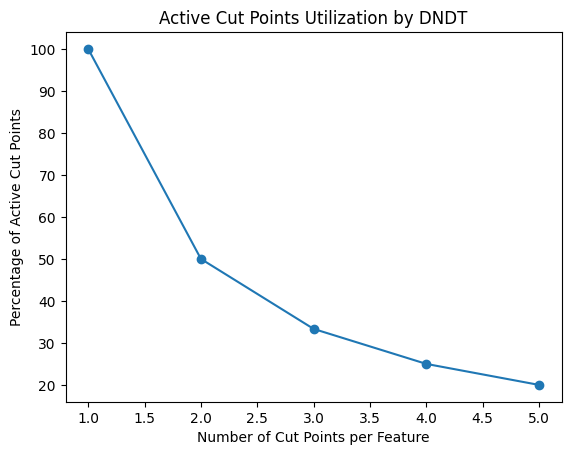

In [119]:
import matplotlib.pyplot as plt 
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Define the range of cut points to test
num_cut_points_options = [1, 2, 3, 4, 5]
cut_point_utilization = []

for num_cut in num_cut_points_options:
    # Define model parameters
    num_leaf = np.prod(np.array([num_cut, num_cut]) + 1)
    num_class = 3
    cut_points_list = [torch.rand([num_cut], requires_grad=True) for _ in range(2)]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)
    
    optimizer = Adam(cut_points_list + [leaf_score], lr=0.01)
    
    # Train the model
    for epoch in range(1000): 
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)  
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()
    
    # Evaluate cut point utilization
    active_cut_points = sum(cp.grad.abs().sum() > 0 for cp in cut_points_list)
    total_cut_points = sum(len(cp) for cp in cut_points_list)
    utilization_percentage = (active_cut_points / total_cut_points) * 100
    cut_point_utilization.append(utilization_percentage)

# Plot the results
plt.plot(num_cut_points_options, cut_point_utilization, marker='o')
plt.xlabel('Number of Cut Points per Feature')
plt.ylabel('Percentage of Active Cut Points')
plt.title('Active Cut Points Utilization by DNDT')
plt.show()

    

### Experiments with Haberman's Survival Dataset

In [ ]:
import pandas as pd

data = pd.read_csv("C:\\Users\\Dshen\\Desktop\\github\\comp551mp4\\COMP551_Mini4\\datasets\\haberman+s+survival\\haberman.data", delimiter=',', header=None, names = ['age', 'year_op', 'num_of_nodes', 'class'])

In [ ]:
data

,age,year_op,num_of_nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
data.loc[1]

age             30
year_op         62
num_of_nodes     3
class            1
Name: 1, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

x = data.iloc[:, [0, 2]].values  
y = data.iloc[:, -1].values


# Convert data to torch tensors
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y - 1).long()  # Subtract 1 here if your labels start at 1

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

num_features = x_train.shape[1]  # Number of features
num_cut = [1] * num_features  # Placeholder: one cut per feature
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = len(np.unique(y_tensor))  # Number of classes

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
for learning_rate in learning_rates:
    # Reinitialize the model parameters
    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Optimizer
    optimizer = Adam(cut_points_list + [leaf_score], lr=learning_rate)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = accuracy_score(y_test.numpy(), test_predictions.numpy())
    print(f"Learning Rate: {learning_rate}, F1 Score: {f1_score_value:.4f}, Accuracy: {accuracy_value:.4f}")

Learning Rate: 0.001, F1 Score: 0.6161, Accuracy: 0.6774
Learning Rate: 0.005, F1 Score: 0.6683, Accuracy: 0.6613
Learning Rate: 0.01, F1 Score: 0.5892, Accuracy: 0.7097
Learning Rate: 0.05, F1 Score: 0.5892, Accuracy: 0.7097
Learning Rate: 0.1, F1 Score: 0.6432, Accuracy: 0.6290
Learning Rate: 0.5, F1 Score: 0.4842, Accuracy: 0.4677
Learning Rate: 1, F1 Score: 0.6639, Accuracy: 0.6613


### Normalized Features

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



x = data.iloc[:, [0, 2]].values  
y = data.iloc[:, -1].values


# Normalize features
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)


# Convert normalized data to torch tensors
x_tensor = torch.tensor(x_normalized).float()
y_tensor = torch.tensor(y).long() - 1  # Subtract 1 here if labels start at 1

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

num_features = x_train.shape[1] 
num_cut = [1] * num_features  # Placeholder: one cut per feature
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = len(np.unique(y_tensor))  # Number of classes

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
for learning_rate in learning_rates:
    # Reinitialize the model parameters
    cut_points_list = [torch.rand([i], requires_grad=True) for i in num_cut]
    leaf_score = torch.rand([num_leaf, num_class], requires_grad=True)

    # Optimizer
    optimizer = Adam(cut_points_list + [leaf_score], lr=learning_rate)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        y_pred = nn_decision_tree(x_train, cut_points_list, leaf_score)
        loss = torch.nn.functional.cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    y_pred_test = nn_decision_tree(x_test, cut_points_list, leaf_score)
    test_predictions = torch.argmax(y_pred_test, axis=1)
    f1_score_value = f1_score(y_test.numpy(), test_predictions.numpy(), average='weighted')
    accuracy_value = accuracy_score(y_test.numpy(), test_predictions.numpy())
    print(f"Learning Rate: {learning_rate}, Accuracy: {accuracy_value:.4f}")
    print(f"Learning Rate: {learning_rate}, F1 Score: {f1_score_value:.4f}")

Learning Rate: 0.001, Accuracy: 0.7097
Learning Rate: 0.001, F1 Score: 0.6687
Learning Rate: 0.005, Accuracy: 0.6935
Learning Rate: 0.005, F1 Score: 0.6432
Learning Rate: 0.01, Accuracy: 0.6935
Learning Rate: 0.01, F1 Score: 0.6432
Learning Rate: 0.05, Accuracy: 0.6935
Learning Rate: 0.05, F1 Score: 0.6432
Learning Rate: 0.1, Accuracy: 0.6935
Learning Rate: 0.1, F1 Score: 0.6432
Learning Rate: 0.5, Accuracy: 0.7097
Learning Rate: 0.5, F1 Score: 0.6545
Learning Rate: 1, Accuracy: 0.6935
Learning Rate: 1, F1 Score: 0.6567
